w# LightGBM

https://lightgbm.readthedocs.io/en/latest/index.html


* **Leaf-wise 트리 성장**으로 더 낮은 손실 달성 가능 (같은 트리 개수 대비 더 좋은 성능 가능)
* **히스토그램 기반 처리**로 속도 빠르고 메모리 사용량 적음
* **카테고리 변수 자동 지원**으로 전처리 필요 없음
* **GPU 지원**이 훌륭하여 대용량 데이터 처리에 유리



**LightGBM vs XGBoost vs HistGradientBoosting (Scikit-Learn)**

| 항목              | **LightGBM**                         | **XGBoost**                | **HistGradientBoosting** (Scikit-Learn) |
| --------------- | ------------------------------------ | -------------------------- | --------------------------------------- |
| **구현 언어**       | C++ / Python / R                     | C++ / Python / R           | Python (Scikit-learn)                   |
| **속도**          | 빠름 (hist 기반 + leaf-wise)             | 비교적 느림 (depth-wise)        | 매우 빠름 (hist 기반)                         |
| **트리 성장 방식**    | **Leaf-wise** (loss 감소 큰 leaf 먼저 분할) | **Depth-wise** (균등 깊이로 성장) | Depth-wise                              |
| **히스토그램 기반 분할** | 지원 (기본 방식)                           | `tree_method='hist'` 필요    | 기본 hist 방식                              |
| **GPU 지원**      | O (빠르고 안정적)                          | O (hist 방식만 지원)            | X                                       |
| **결측값 처리**      | 자동 처리                                | 자동 처리                      | 자동 처리                                   |
| **카테고리 변수 지원**  | O (자동 처리, 원핫 필요 없음)                  | X (LabelEncoder 필요)        | 제한적 (명시적 지원 X)                          |
| **병렬 처리**       | O (leaf-wise + feature 병렬)           | O                          | O                                       |
| **메모리 효율성**     | 매우 좋음                                | 보통                         | 매우 좋음                                   |
| **커스터마이징**      | 높음 (다양한 Objective/Metric 지원)         | 높음                         | 낮음 (Scikit-learn API 제한적)               |
| **조기 종료**       | O                                    | O                          | O                                       |
| **사용 편의성**      | 중간 (Booster vs sklearn API 있음)       | 중간                         | 높음                                      |



**학습방식**

| 항목     | `fit()`                                           | `lgb.train()`                         |
| ------ | ------------------------------------------------- | ------------------------------------- |
| 사용 객체  | `LGBMClassifier`, `LGBMRegressor` (sklearn API)   | `lgb.Dataset` + 직접 모델 학습 (native API) |
| 인터페이스  | `scikit-learn` 스타일 (pipeline, grid search 등과 호환됨) | LightGBM 고유 방식                        |
| 사용 편의성 | **간편함** – 파이프라인에 적합                               | **유연함** – 세부 조정 가능                    |
| 조기 종료  | `early_stopping_rounds` 파라미터로 간단히 사용 가능           | `callbacks` 함수로 직접 제어                 |
| 결과     | `LGBMClassifier` 등 sklearn 호환 모델 객체               | `Booster` 객체 반환                       |
| 사용 예   | 실무 대부분 상황, 교차검증 등                                 | 세밀한 제어가 필요할 때, 커스터마이징된 학습 루프가 필요할 때   |


**추천 기준**
1. 일반적인 사용 (머신러닝 파이프라인 포함):
  - LGBMClassifier(...).fit(X_train, y_train)
  - sklearn처럼 쓰면 됨
2. 세밀한 제어(early stopping, custom metric, verbose 조정 등)
  - lgb.train(params, train_set, valid_sets=..., callbacks=...)


## 환경설정
1. os-level c++ build tool 설치
2. pip install lightgbm

In [95]:
# %pip install lightgbm

In [96]:
import lightgbm
from numpy.f2py.crackfortran import true_intent_list

lightgbm.__version__

'4.6.0'

## 이진분류

In [97]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

print(X.shape)
X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
# 데이터 준비
from sklearn.model_selection import train_test_split

# 학습/평가셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

# 학습/검증셋 분할
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42,
                                            stratify=y_train)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(409, 30) (409,)
(46, 30) (46,)
(114, 30) (114,)


In [99]:
from lightgbm import early_stopping, LGBMRegressor, log_evaluation
# 모델 학습
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.01,
    verbosity=-1

)

lgbm_clf.fit(X_tr, y_tr,
             eval_set=[(X_val, y_val)],
             eval_metric='logloss',  #이진분류
             eval_names=['train', 'val'],  # 설정한 이름으로 볼 수 있다.
             callbacks=[
                 early_stopping(stopping_rounds=10, verbose=True),
             ]
             )
# [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
# -> 트리 분할을 못한다. gain-> 감소하는 양이 있어야하는데 없다. 만약 이 로그가 보기 싫다.-> verbosity=-1


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[306]	train's binary_logloss: 0.198424


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.01
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [100]:
# 평가
print(f'Train Accuracy: {lgbm_clf.score(X_tr, y_tr): .4f}')
print(f'Test Accuracy: {lgbm_clf.score(X_val, y_val): .4f}')

Train Accuracy:  0.9976
Test Accuracy:  0.9348


In [101]:
# lightgbm train api 사용(저수준) -> 이것저것 많이 사용할 수 있다.
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, root_mean_squared_error, r2_score

# 1. Dataset 객체
ds_tr = lgb.Dataset(X_tr, y_tr)
ds_val = lgb.Dataset(X_val, y_val, reference=ds_tr)  # ds_tr 구조를 동일하게 참조(binning 정보를 참조)
# X_tr 기준으로 구간을 나누면 X_val 할때도 구조를 동일하게 참조해라

# 2. 모델 생성
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'verbose': 1,  # 로그출력해줘
    'verbosity': -1
}

# 이 train의 반환값이 실제 모델이 된다. params가 그대로 들어오게 됨
lgbm_clf = lgb.train(
    params,
    ds_tr,
    num_boost_round=500,  # n_estimator와 동일 약학습기 개수
    valid_sets=[ds_val, ds_tr],
    valid_names=['val', 'train'],
    callbacks=[
        early_stopping(stopping_rounds=10, verbose=True),
    ])

# 3. 평가
# 학습셋 평가
y_pred_proba = lgbm_clf.predict(X_tr)  # 양성클래스일 확률 반환
print(y_pred_proba[:5])

y_pred = (y_pred_proba > 0.5).astype(int)  # 예측값 0,1 반환
print(f'Train Acccuracy: {accuracy_score(y_tr, y_pred): .4f}')
print(f'Train F1: {f1_score(y_tr, y_pred): .4f}')

# 평가셋
y_pred_proba = lgbm_clf.predict(X_test)  # 양성클래스일 확률 반환
print(y_pred_proba[:5])

y_pred = (y_pred_proba > 0.5).astype(int)  # 예측값 0,1 반환
print(f'Test Acccuracy: {accuracy_score(y_test, y_pred): .4f}')
print(f'Test F1: {f1_score(y_test, y_pred): .4f}')

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0393398	val's binary_logloss: 0.193296
[0.04818897 0.98826146 0.01897717 0.98709993 0.97374358]
Train Acccuracy:  0.9976
Train F1:  0.9981
[0.01914776 0.98876437 0.04057065 0.12859357 0.01921082]
Test Acccuracy:  0.9474
Test F1:  0.9583


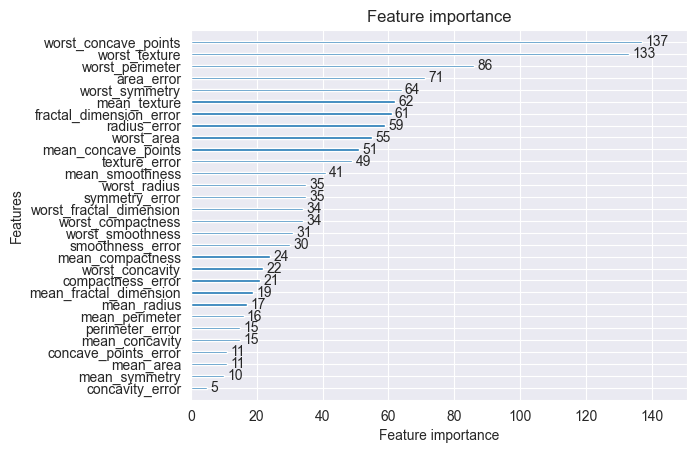

In [102]:
# 특성 중요도
from lightgbm import plot_importance
import matplotlib.pyplot as plt

plot_importance(lgbm_clf) # 이거 쓰면 그냥 소트됨
plt.show()


## 다중분류

In [103]:
import pandas as pd

# otto 제품 분류 데이터셋
otto_df = pd.read_csv('https://d.pr/f/T0b9tp+')  # otto_train.csv
otto_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [104]:
print(otto_df.shape)  # 6만여개 데이터, 특성 95개

print(otto_df['target'].value_counts())

otto_df.info()

(61878, 95)
target
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-nul

In [113]:
# 데이터준비
X = otto_df.drop(['id', 'target'], axis=1)
y = otto_df['target'].factorize()[0]  #(숫자인코딩, 문자열클래스)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(44551, 93) (44551,)
(4951, 93) (4951,)
(12376, 93) (12376,)


In [106]:
# 모델 학습
lgbm_clf = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.01,
    random_state=42,
)

lgbm_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val), (X_val, y_val)],
    eval_names=['train', 'val'],
    eval_metric='multi_logloss',  # 다중분류면 multi_logloss, 이진분류면 binary_logloss
    callbacks=[
        early_stopping(stopping_rounds=10, verbose=True),
    ]

)

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[500]	train's multi_logloss: 0.542338	val's multi_logloss: 0.542338


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.01
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [107]:
# 평가
print(f'Train Accuracy : {lgbm_clf.score(X_tr, y_tr): .4f}')
print(f'Test Accuracy : {lgbm_clf.score(X_test, y_test): .4f}')

Train Accuracy :  0.8474
Test Accuracy :  0.8079


## 회귀
- objective : regression
- eval_metric : rmsse

In [117]:
# 캘리포니아 집값 예측

from sklearn.datasets import fetch_california_housing
from lightgbm import LGBMRegressor, log_evaluation
from sklearn.metrics import r2_score, root_mean_squared_error



# 데이터 준비
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# 데이터 분할
# - 학습/검증/평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



# 모델 학습
# - 모델 생성 LGBMRegressor()
# - 모델 학습 fit()
lgbm_reg = LGBMRegressor(
    random_state=42,
    n_estimators=5000,
    learning_rate=0.01,
    num_leaves=31, # 트리당 가질 수 있는 최대 리프노드
    objective='regression', # 목적은 regression
)

lgbm_reg.fit(X_tr, y_tr,
             eval_set=[(X_val, y_val), (X_val, y_val)],
             eval_names=['train', 'val'],
             eval_metric='rmse',
             callbacks=[
                 early_stopping(stopping_rounds=10, verbose=True),
                 log_evaluation(period=10) # 반복 10회마다
             ]
             )


# (참고) train's l2: l2 규제모델 아니라 MSE이다.
# l1 loss: MAE
# l2 loss: MSE

# 평가
# - R2
# - RMSE

print(f'Train R2 : {lgbm_reg.score(X_tr, y_tr): .4f}')
print(f'Train RMSE : {root_mean_squared_error(y_tr, lgbm_reg.predict(X_tr)):.4f}')
print(f'Test R2 : {lgbm_reg.score(X_test, y_test): .4f}')
print(f'Test RMSE : {root_mean_squared_error(y_test, lgbm_reg.predict(X_test)):.4f}')


Training until validation scores don't improve for 10 rounds
[10]	train's rmse: 1.11006	train's l2: 1.23223	val's rmse: 1.11006	val's l2: 1.23223
[20]	train's rmse: 1.04492	train's l2: 1.09186	val's rmse: 1.04492	val's l2: 1.09186
[30]	train's rmse: 0.987283	train's l2: 0.974728	val's rmse: 0.987283	val's l2: 0.974728
[40]	train's rmse: 0.936103	train's l2: 0.876288	val's rmse: 0.936103	val's l2: 0.876288
[50]	train's rmse: 0.890724	train's l2: 0.793388	val's rmse: 0.890724	val's l2: 0.793388
[60]	train's rmse: 0.851042	train's l2: 0.724273	val's rmse: 0.851042	val's l2: 0.724273
[70]	train's rmse: 0.816238	train's l2: 0.666244	val's rmse: 0.816238	val's l2: 0.666244
[80]	train's rmse: 0.784893	train's l2: 0.616057	val's rmse: 0.784893	val's l2: 0.616057
[90]	train's rmse: 0.757609	train's l2: 0.573972	val's rmse: 0.757609	val's l2: 0.573972
[100]	train's rmse: 0.732296	train's l2: 0.536257	val's rmse: 0.732296	val's l2: 0.536257
[110]	train's rmse: 0.710248	train's l2: 0.504453	val's 